# Importando Bibliotecas

In [31]:
import pandas as pd
from matplotlib import pyplot as plt

# Pie Chart
Gráfico Pie com alguns parametros de personalização

In [57]:
# Definindo estilo
plt.style.use('fivethirtyeight')

In [61]:
# Parametros de Tamanho, Nome, Cor e Deslocamento
slices = [30, 40, 10, 20] # Tamanho dos Pedaços
labels = ['Primeiro','Segundo', 'Terceiro', 'Quarto'] # Rótulos de Cada Pedaço
colors = ['yellow', 'green', 'white', 'deepskyblue'] # Cores de cada Pedaço
explode = [0.1, 0.0, 0, 0.0] # Deslocamento de cada pedaço.

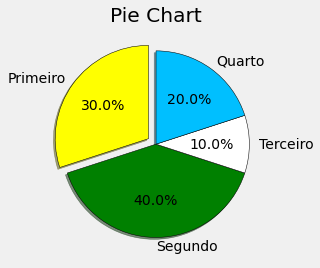

In [62]:
plt.title("Pie Chart")
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        wedgeprops={'edgecolor':'black'}, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.show()

# Stack Plot: 
Plotando gráfico da relação entre os minutos de partida e os pontos marcados por cada jogador.

In [55]:
# Tempo da Partida em Minutos
minutes = [1,2,3,4,5,6,7,8,9,10] 

# Players na Partida
player1 = [1,1,1,1,2,3,4,5,5,5]
player2 = [1,2,3,4,4,4,4,5,5,5]
player3 = [1,2,2,3,4,5,5,5,6,6]

# Labels dos Players
labels = ['Player1', 'Player2', 'Player3']

# Cores dos Jogadores
colors = ['Yellow', 'Deepskyblue', 'Green']

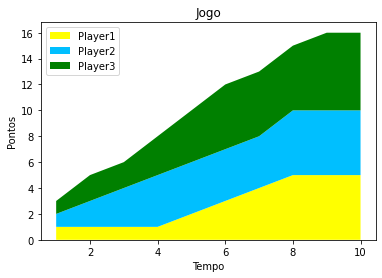

In [56]:
plt.stackplot(minutes, player1, player2, player3, labels=labels, 
              colors=colors)
plt.legend(loc='upper left') # Posição da Legenda
plt.title('Jogo') # Título
plt.xlabel('Tempo')
plt.ylabel('Pontos')
plt.show()

# Historigramas

In [15]:
idade_alunos = [19, 20, 21, 22, 25, 25, 32, 33, 40, 51]
bins = [10, 20, 30, 40, 50, 60]
media = sum(idade_alunos) / len(idade_alunos)

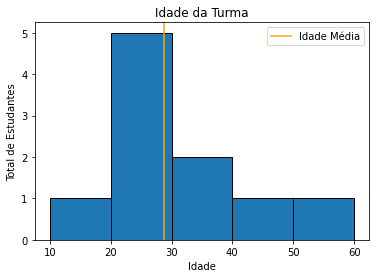

In [22]:
plt.hist(idade_alunos, bins, edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Total de Estudantes')
plt.title('Idade da Turma')
plt.axvline(media, color='orange', label='Idade Média')
plt.legend()
plt.show()

# Scatter

In [48]:
x = [1,2,3,4,5,6,7,8,9,10] 
y = [2,3,3.5,6,7,7.5,8,10,9,10]

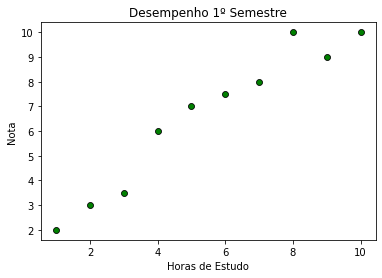

In [51]:
plt.scatter(x, y, edgecolor='black', linewidth=0.8, color='green', alpha=1)
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota')
plt.title('Desempenho 1º Semestre')
plt.show()

# Times Series Data
Apresentando datas no gráfico em relação com algum atributo

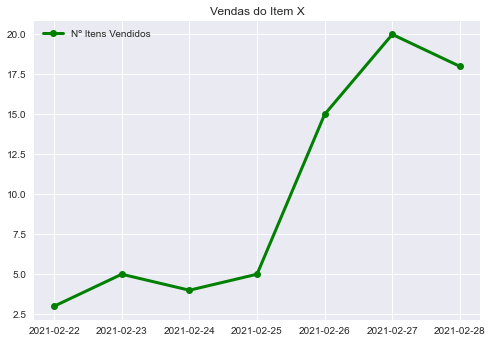

In [4]:
from datetime import datetime

dates = [
    datetime(2021, 2, 22),
    datetime(2021, 2, 23),
    datetime(2021, 2, 24),
    datetime(2021, 2, 25),
    datetime(2021, 2, 26),  #
    datetime(2021, 2, 27),
    datetime(2021, 2, 28)
]

items_vendidos = [3,5,4,5,15,20,18]

plt.style.use('seaborn')
plt.plot_date(dates, items_vendidos, linewidth=3,  
              linestyle='solid', color='green', 
              label='Nº Itens Vendidos')
plt.legend()
plt.title('Vendas do Item X')
plt.show()

O Item X vende mais na sexta feira e aos finais de semana.

# Plotting Live Data in Real-Time
Simulando o número de inscritos de dois canais do Youtube.

In [30]:
from matplotlib.animation import FuncAnimation
from random import randint

In [31]:
canal1_dias = []
canal1_inscritos = []
count = 0

In [32]:
def animate(i):
    count = 0
    count += 1
    canal1_dias.append(count)
    canal1_inscritos.append(randint(0,10))
    plt.plot(canal1_dias, canal1_inscritos)
    

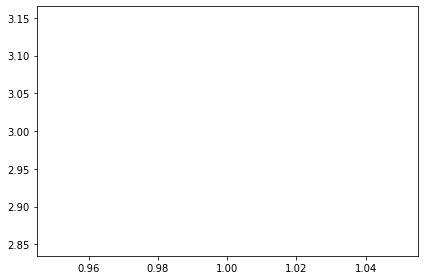

In [33]:
#animation = FuncAnimation(plt.gcf(), animate(), interval=1000)
plt.tight_layout()
plt.show()

# Animação: FuncAnimation()
#### Uso da CPU em % no gráfico.

In [85]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from matplotlib.artist import Artist
from matplotlib import pyplot as plt
from psutil import cpu_percent

In [86]:
cpu_percent() # Retorna a procentagem de uso da CPU no momento de execução

24.6

<IPython.core.display.Javascript object>


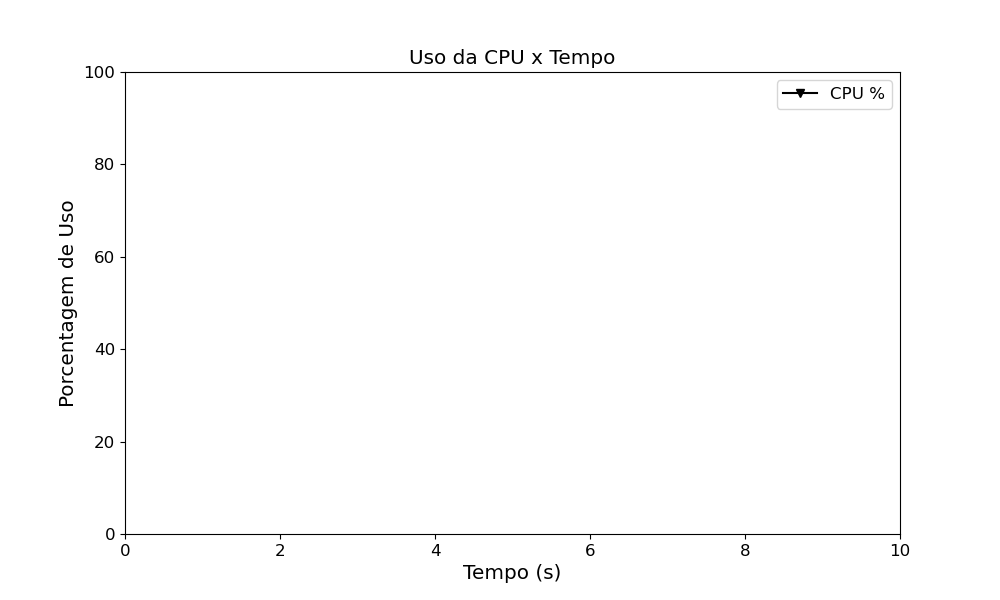

In [87]:
x, y = [], []
fig, ax = plt.subplots(figsize=(10,6))
line, = ax.plot(y, label='CPU %')

### Criando uma função que será chamada repetidas vezes para criar a animação.

In [88]:
def init():
    # Essa função só será chamada 1 vez(no inicio) pela FuncAnimation()
    
    line.set_data([],[]) # Setando valores da linha
    
    # Agora vou fazer algumas personalizações
    line.set_color('k')
    line.set_marker('v')
    
    ax.set(xlim=(0,10), ylim=(0,100)) # Limites dos eixos
    ax.set_xlabel('Tempo (s)', fontsize='large')
    ax.set_ylabel('Porcentagem de Uso', fontsize='large')
    ax.set_title('Uso da CPU x Tempo', fontsize='large')
    ax.legend()
    
    plt.rcParams.update({'font.size': 12})
    return line,

In [89]:
def animate(i):
    #Atualizando Dados
    x.append(i)
    y.append(cpu_percent()) 
    
    # Desenhando a Linha
    line.set_data(x, y)

    # Limpando o texto de porcentagem anterior.
    for txt in ax.texts:
        Artist.remove(txt)
        
    # Posicionando a porcentagem ao lado da cordenada x,y.
    texto = ax.text(x[i], y[i], 
        '{}%'.format(y[i]), 
        position=(x[i]+0.5, y[i]),
        fontweight=600,
        color='white',
        backgroundcolor='black')

    # Movimentando eixo x
    if i >= 8:
        ax.set_xlim(i-8, i+5)
        
    return line,

In [90]:
animation = FuncAnimation(fig, animate, frames=20, interval=1000, blit=True, init_func=init)

In [61]:
plt.show() # Os resultados são exibidos na Figura 1 disposta acima.

In [34]:
x

[]

In [91]:
animation.save('cpu_usage.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.
